In [1]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
data=pd.read_excel('Training_data_1.xlsx')

#data = pd.get_dummies(data, columns=['host-rock type','protolith'])

data= data.replace('<0.03', 0)
data= data.replace(np.nan, 0)

data= data.drop(columns=['author','journal','region','sample name','host-rock_type/metamorphic_facies','lithology/protolith','P(kbar)','T(°C)',])



In [3]:
data.head()

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,GR,M,38.35,0.04,20.54,0.01,0.0,6.54,5.13,0.78
1,GR,M,38.14,0.01,20.40,0.03,0.0,6.61,5.35,0.74
2,GR,M,37.77,0.02,20.37,0.01,0.0,6.81,5.05,0.76
3,GR,M,38.25,0.02,20.22,0.04,0.0,6.87,5.00,0.79
4,GR,M,38.02,0.00,20.34,0.05,0.0,7.00,4.88,0.80


In [4]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Assigning numerical values and storing in another column
data['Comp'] = le.fit_transform(data['composition'])

data_rev=data[['SiO2','TiO2','Al2O3','Cr2O3','FeOtotal','MnO','MgO','CaO']]
data_rest=data.drop(columns=['SiO2','TiO2','Al2O3','Cr2O3','FeOtotal','MnO','MgO','CaO'])


In [5]:
data_1=data.copy()

In [6]:
data_1.head()

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO,Comp
0,GR,M,38.35,0.04,20.54,0.01,0.0,6.54,5.13,0.78,3
1,GR,M,38.14,0.01,20.40,0.03,0.0,6.61,5.35,0.74,3
2,GR,M,37.77,0.02,20.37,0.01,0.0,6.81,5.05,0.76,3
3,GR,M,38.25,0.02,20.22,0.04,0.0,6.87,5.00,0.79,3
4,GR,M,38.02,0.00,20.34,0.05,0.0,7.00,4.88,0.80,3


In [7]:


df=data_1.copy()
labels_1=['A','CS','IF','M','S','UM']
labels= le.fit_transform(df['Comp'])
data_X= df.drop(columns=['metamorphic_facies','composition',])
data_X= data_X.drop(columns=['Comp'])



In [8]:
feature_names=list(data_X.columns.values.tolist())

In [9]:
feature_names

['SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOtotal', 'MnO', 'MgO', 'CaO']

In [10]:
data_X

,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74
2,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79
4,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80
...,...,...,...,...,...,...,...,...
14378,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26
14379,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22
14381,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55


In [11]:
labels

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [12]:
x = data_X.values
x = StandardScaler().fit_transform(x) # normalizing the features

<IPython.core.display.Javascript object>

In [13]:
x

array([[-1.38036826e-01, -2.62505736e-01,  3.61380335e-02, ...,
         8.92672333e-01, -2.60316661e-01, -9.95940719e-01],
       [-2.46305055e-01, -3.13615122e-01, -1.24671200e-03, ...,
         9.08088081e-01, -2.26739154e-01, -1.00095889e+00],
       [-4.37063364e-01, -2.96578660e-01, -9.25772889e-03, ...,
         9.52133076e-01, -2.72526664e-01, -9.98449806e-01],
       ...,
       [-9.78404510e-01, -9.21411185e-02, -4.80518651e+00, ...,
        -2.56902035e-01, -1.02344183e+00,  2.82288847e+00],
       [-2.25682535e-01, -3.30651584e-01, -3.30178567e+00, ...,
        -2.15059290e-01, -1.03259933e+00,  2.98974270e+00],
       [-9.06225691e-01, -3.30651584e-01, -4.90398905e+00, ...,
        -3.31778526e-01, -1.01275808e+00,  2.86177930e+00]])

In [14]:
x.shape

(14383, 8)

In [15]:
np.mean(x),np.std(x)

(1.7586957792574265e-16, 1.0)

In [16]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [17]:
normalised_df=pd.DataFrame(x,columns=feat_cols)

In [18]:
normalised_df.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
14378,-0.483464,-0.075105,-3.248379,-0.252018,-0.251602,-0.232677,-1.032599,2.953361
14379,-0.452530,-0.228433,-3.547457,-0.082087,-0.149850,-0.230475,-1.015811,2.918234
14380,-0.978405,-0.092141,-4.805187,-0.252018,0.565766,-0.256902,-1.023442,2.822888
14381,-0.225683,-0.330652,-3.301786,-0.252018,-0.260547,-0.215059,-1.032599,2.989743
14382,-0.906226,-0.330652,-4.903989,-0.252018,0.598193,-0.331779,-1.012758,2.861779


In [19]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=4)
principalComponents_df = pca_df.fit_transform(x)

In [19]:
'principal component 5', 'principal component 6', 'principal component 7','principal component 8'

('principal component 5',
 'principal component 6',
 'principal component 7',
 'principal component 8')

In [20]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'
                         ])

In [21]:
principal_df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4
14378,2.186396,3.428935,-0.412154,-1.210866
14379,2.225661,3.530507,-0.372486,-1.470327
14380,3.170339,3.898558,-0.704056,-1.597397
14381,2.056146,3.383961,-0.360762,-1.441086
14382,3.146223,3.883860,-0.748854,-1.842456


In [22]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))


Explained variation per principal component: [0.35804917 0.25683442 0.12884837 0.11189149]


In [23]:
print(abs( pca_df.components_.T ))

[[0.55303515 0.0142122  0.01378376 0.02576395]
 [0.03621602 0.36150307 0.15859201 0.83062366]
 [0.27090575 0.54306633 0.0030617  0.19506679]
 [0.25871396 0.30996088 0.28401134 0.40595093]
 [0.39618028 0.37375165 0.35333788 0.12040078]
 [0.21956716 0.11307828 0.86736091 0.22511788]
 [0.55917869 0.03755595 0.07461648 0.12131383]
 [0.18619431 0.56941138 0.10609682 0.16328469]]


In [24]:
loadings = pca_df.components_.T * np.sqrt(pca_df.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['principal component 1', 'principal component 2',
                                                 'principal component 3','principal component 4'
                                                ], index=feature_names)
loading_matrix

,principal component 1,principal component 2,principal component 3,principal component 4
SiO2,-0.936018,-0.020373,-0.013995,-0.024376
TiO2,0.061296,0.518202,-0.161020,0.785892
Al2O3,-0.458511,-0.778466,0.003109,0.184562
Cr2O3,-0.437876,0.444318,0.288360,-0.384089
FeOtotal,0.670539,-0.535759,-0.358748,-0.113917
MnO,0.371620,-0.162094,0.880642,0.212995
MgO,-0.946416,0.053835,-0.075759,0.114781
CaO,0.315136,0.816231,-0.107721,-0.154491


In [39]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(principal_df)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14383 samples in 0.068s...
[t-SNE] Computed neighbors for 14383 samples in 1.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14383
[t-SNE] Computed conditional probabilities for sample 2000 / 14383
[t-SNE] Computed conditional probabilities for sample 3000 / 14383
[t-SNE] Computed conditional probabilities for sample 4000 / 14383
[t-SNE] Computed conditional probabilities for sample 5000 / 14383
[t-SNE] Computed conditional probabilities for sample 6000 / 14383
[t-SNE] Computed conditional probabilities for sample 7000 / 14383
[t-SNE] Computed conditional probabilities for sample 8000 / 14383
[t-SNE] Computed conditional probabilities for sample 9000 / 14383
[t-SNE] Computed conditional probabilities for sample 10000 / 14383
[t-SNE] Computed conditional probabilities for sample 11000 / 14383
[t-SNE] Computed conditional probabilities for sample 12000 / 14383
[t-SNE] Computed conditional probabilities for sa

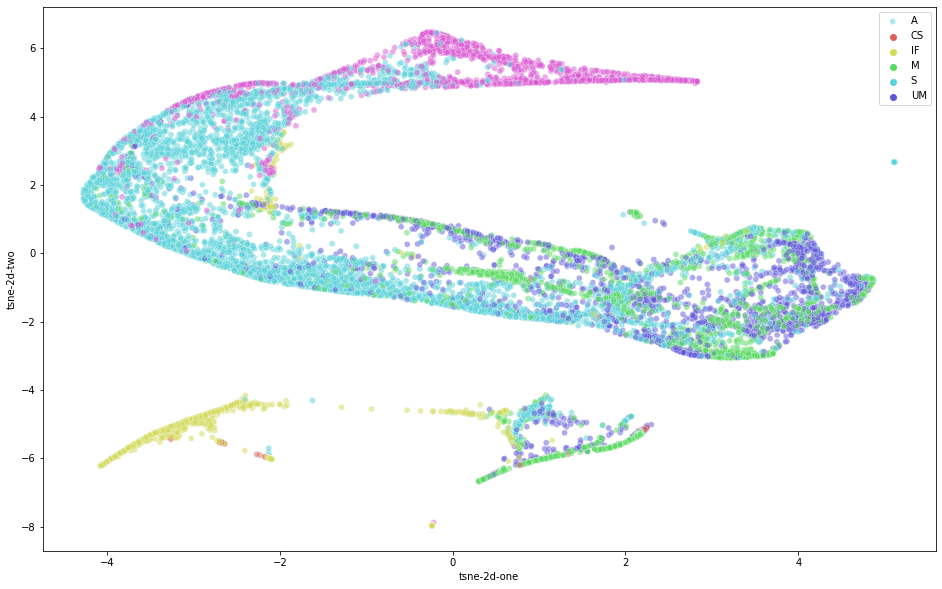

In [34]:
principal_df['tsne-2d-one'] = tsne_results[:,0]
principal_df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=labels,
    palette=sns.color_palette("hls", 6),
    data=principal_df,
    alpha=0.5
)
plt.legend(labels_1)

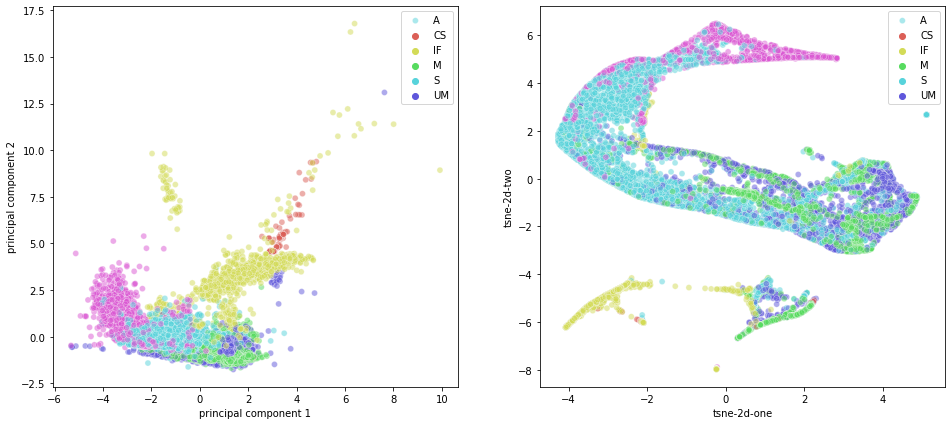

In [38]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue=labels,
    palette=sns.color_palette("hls", 6),
    data=principal_df,
    alpha=0.5,
    ax=ax1
)
plt.legend(labels_1)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=labels,
    palette=sns.color_palette("hls", 6),
    data=principal_df,
    alpha=0.5,
    ax=ax2
)
plt.legend(labels_1)